#### Water-mass Methods Package
##### Minimum Transport Method (MTM) Tutorial by Taimoor Sohail

This tutorial script walks the user through the functionality of the MTM Code within the WM_Methods package

In [2]:
# Import the MTM function from the WM_Methods package
from WM_Methods import MTM
import numpy as np
import matplotlib.pyplot as plt

### Defining 'tracers' and 'volumes'

In [60]:
### OVERRIDING PARAMS IF WE WANT TO ASSESS SIMPLE 2-4 WM cases ###
## Comment this out to run the usual tutorial case above ##
### MIXING ONLY ###
T1 = np.array([1,1,3,3])
T2 = np.array([2,2,2,2])
S1 = np.array([1,3,1,3])
S2 = np.array([2,2,2,2])
V1 = np.array([1,1,1,1])
V2 = np.array([4,0,0,0])
A1 = np.array([1,1,1,1])
A2 = np.array([1,1,1,1])

salinities = np.stack((S1.flatten(), S2.flatten()), axis=0)
temps = np.stack((T1.flatten(), T2.flatten()), axis=0)

volumes_mix = np.stack((V1.flatten(), V2.flatten()), axis=0) # Shape: [2 x N]
tracers_mix = np.stack((salinities, temps),axis=1) # Shape: [2 x M x N], where M = 2 for just T and S, and M>2 for T,S+other tracers
constraints_mix = np.ones((V1.flatten().size,V2.flatten().size))
weights_mix = np.stack((A2.flatten(),A2.flatten()), axis=0)

result_mix = MTM.optimise(tracers_mix, volumes_mix, constraints_mix, weights_mix)

g_ij_mix = result_mix['g_ij'] ## An [N x N] matrix of transports between WMs
Mixing_mix = result_mix['Mixing'] ## An [M x N] matrix of dtracer mixing for each WM
Adjustment_mix = result_mix['Adjustment'] ## An [M x N] matrix of dtracer adjustment for each WM


### FLUX ONLY ###
T1 = np.array([1.5,2.5,1.5,2.5])
T2 = np.array([0.5,3.5,0.5,3.5])
S1 = np.array([1.5,1.5,2.5,2.5])
S2 = np.array([0.5,0.5,3.5,3.5])
V1 = np.array([1,1,1,1])
V2 = np.array([1,1,1,1])
A1 = np.array([1,1,1,1])
A2 = np.array([1,1,1,1])

salinities = np.stack((S1.flatten(), S2.flatten()), axis=0)
temps = np.stack((T1.flatten(), T2.flatten()), axis=0)

volumes_flux = np.stack((V1.flatten(), V2.flatten()), axis=0) # Shape: [2 x N]
tracers_flux = np.stack((salinities, temps),axis=1) # Shape: [2 x M x N], where M = 2 for just T and S, and M>2 for T,S+other tracers
constraints_flux = np.ones((V1.flatten().size,V2.flatten().size))
weights_flux = np.stack((A2.flatten(),A2.flatten()), axis=0)

result_flux = MTM.optimise(tracers_flux, volumes_flux, constraints_flux, weights_flux)

g_ij_flux = result_flux['g_ij'] ## An [N x N] matrix of transports between WMs
Mixing_flux = result_flux['Mixing'] ## An [M x N] matrix of dtracer mixing for each WM
Adjustment_flux = result_flux['Adjustment'] ## An [M x N] matrix of dtracer adjustment for each WM

### FLUX+MIXING ONLY ###


T1 = np.array([1,3,1,3])
T2 = np.array([2,1,2,3])
S1 = np.array([2,2,3.5,3.5])
S2 = np.array([1,2,3,2])
V1 = np.array([1,1,1,1])
V2 = np.array([4,0,0,0])
A1 = np.array([1,1,1,1])
A2 = np.array([1,1,1,1])

salinities = np.stack((S1.flatten(), S2.flatten()), axis=0)
temps = np.stack((T1.flatten(), T2.flatten()), axis=0)

volumes_flmix = np.stack((V1.flatten(), V2.flatten()), axis=0) # Shape: [2 x N]
tracers_flmix = np.stack((salinities, temps),axis=1) # Shape: [2 x M x N], where M = 2 for just T and S, and M>2 for T,S+other tracers
constraints_flmix = np.ones((V1.flatten().size,V2.flatten().size))
weights_flmix = np.stack((A2.flatten(),A2.flatten()), axis=0)

result_flmix = MTM.optimise(tracers_flmix, volumes_flmix, constraints_flmix, weights_flmix)

g_ij_flmix = result_flmix['g_ij'] ## An [N x N] matrix of transports between WMs
Mixing_flmix = result_flmix['Mixing'] ## An [M x N] matrix of dtracer mixing for each WM
Adjustment_flmix = result_flmix['Adjustment'] ## An [M x N] matrix of dtracer adjustment for each WM



                                     CVXPY                                     
                                    v1.1.13                                    
(CVXPY) Jun 03 02:55:25 PM: Your problem has 16 variables, 2 constraints, and 0 parameters.
(CVXPY) Jun 03 02:55:25 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 03 02:55:25 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 03 02:55:25 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jun 03 02:55:25 PM: Compiling problem (target solver=MOSEK).
(CVXPY) Jun 03 02:55:25 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -

/Users/taimoor/Library/CloudStorage/OneDrive-UNSW/Desktop/Desktop - Taimoor’s UNSW MacBook Pro/UNSW Work/MIN_MIX_FINAL/WM_Methods/MTM.py:100: RuntimeWarning: invalid value encountered in true_divide
  Tmixed = np.matmul(Tmatrix,g_ij)/volumes[1,:]
/Users/taimoor/Library/CloudStorage/OneDrive-UNSW/Desktop/Desktop - Taimoor’s UNSW MacBook Pro/UNSW Work/MIN_MIX_FINAL/WM_Methods/MTM.py:103: RuntimeWarning: invalid value encountered in true_divide
  Smixed = np.matmul(Smatrix,g_ij)/volumes[1,:]


### Running the optimiser

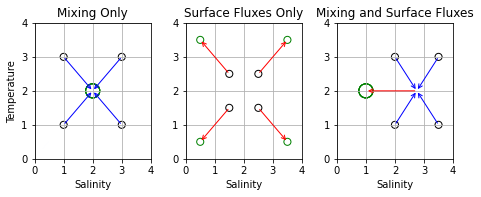

In [64]:
fig, axs = plt.subplots(1,3, figsize=(7.5,2.5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=0.3)
axs = axs.ravel() 

for i in range(V1.flatten().size):
        axs[0].scatter(tracers_mix[0,0,i],tracers_mix[0,1,i],\
                s=50,\
                marker = 'o', facecolors='none', edgecolors='black', label = 'Inital watermasses')
        axs[0].scatter(tracers_mix[1,0,i],tracers_mix[1,1,i],\
                s=200,\
                marker = 'o', facecolors='none', edgecolors='green', label = 'Final watermasses')
        axs[0].annotate('', xy=(tracers_mix[0,0,i], tracers_mix[0,1,i]), \
                xytext=(tracers_mix[0,0,i]+Mixing_mix[0,:][i], tracers_mix[0,1,i]+Mixing_mix[1,:][i]),
        arrowprops=dict(arrowstyle="<-", color='blue'))
        axs[0].annotate('', xy=(tracers_mix[0,0,i]+Mixing_mix[0,:][i], tracers_mix[0,1,i]+Mixing_mix[1,:][i]), \
                        xytext=(tracers_mix[0,0,i]+Mixing_mix[0,:][i]+Adjustment_mix[0,:][i], \
                                tracers_mix[0,1,i]+Mixing_mix[1,:][i]+Adjustment_mix[1,:][i]),
        arrowprops=dict(arrowstyle="<-", color='red'))
        ## FLUX ##
        axs[1].scatter(tracers_flux[0,0,i],tracers_flux[0,1,i],\
                s=50,\
                marker = 'o', facecolors='none', edgecolors='black', label = 'Inital watermasses')
        axs[1].scatter(tracers_flux[1,0,i],tracers_flux[1,1,i],\
                s=50,\
                marker = 'o', facecolors='none', edgecolors='green', label = 'Final watermasses')
        # axs[1].annotate('', xy=(tracers_flux[0,0,i], tracers_flux[0,1,i]), \
        #         xytext=(tracers_flux[0,0,i]+Mixing_flux[0,:][i], tracers_flux[0,1,i]+Mixing_flux[1,:][i]),
        # arrowprops=dict(arrowstyle="<-", color='blue'))
        axs[1].annotate('', xy=(tracers_flux[0,0,i]+Mixing_flux[0,:][i], tracers_flux[0,1,i]+Mixing_flux[1,:][i]), \
                        xytext=(tracers_flux[0,0,i]+Mixing_flux[0,:][i]+Adjustment_flux[0,:][i], \
                                tracers_flux[0,1,i]+Mixing_flux[1,:][i]+Adjustment_flux[1,:][i]),
        arrowprops=dict(arrowstyle="<-", color='red'))
        ## FLUX+MIX ##
        axs[2].scatter(tracers_flmix[0,0,i],tracers_flmix[0,1,i],\
                s=50,\
                marker = 'o', facecolors='none', edgecolors='black', label = 'Inital watermasses')
        axs[2].scatter(tracers_flmix[1,0,0],tracers_flmix[1,1,0],\
                s=200,\
                marker = 'o', facecolors='none', edgecolors='green', label = 'Final watermasses')
        axs[2].annotate('', xy=(tracers_flmix[0,0,i], tracers_flmix[0,1,i]), \
                xytext=(tracers_flmix[0,0,i]+Mixing_flmix[0,:][i], tracers_flmix[0,1,i]+Mixing_flmix[1,:][i]),
        arrowprops=dict(arrowstyle="<-", color='blue'))
        axs[2].annotate('', xy=(tracers_flmix[0,0,i]+Mixing_flmix[0,:][i], tracers_flmix[0,1,i]+Mixing_flmix[1,:][i]), \
                        xytext=(tracers_flmix[0,0,i]+Mixing_flmix[0,:][i]+Adjustment_flmix[0,:][i], \
                                tracers_flmix[0,1,i]+Mixing_flmix[1,:][i]+Adjustment_flmix[1,:][i]),
        arrowprops=dict(arrowstyle="<-", color='red'), label = 'Mixing')

for i in range(3):
        axs[i].set_xlim(0,4)
        axs[i].set_xlabel('Salinity')
        axs[i].set_xticks([0,1,2,3,4])
        axs[i].set_yticks([0,1,2,3,4])
        axs[i].grid()
        axs[i].set_ylim(0,4)
axs[1].set_title('Surface Fluxes Only')
axs[0].set_title('Mixing Only')
axs[2].set_title('Mixing and Surface Fluxes')
axs[0].set_ylabel('Temperature')
plt.savefig('Figures/Simple_optimal_cases.png', bbox_inches='tight', dpi=300)
plt.show()